<a href="https://colab.research.google.com/github/MarioSolano98/actividad-evaluativa3-AC/blob/main/actividad_evaluativa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **Maestria en Ciencia de Datos**
##           **Análisis Cuantitativo**
##           **Examen 3**

**Profesores:** Santiago Ortiz - Henry Velasco

**Integrantes:**
* Andrea Valencia
* David Casanova
* Pedro Jojoa
* Mario Solano

# **1.0 Ejercicio 1**

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cargar el archivo de datos y explorar los primeros registros
path = '/content/HousingData.csv'
df = pd.read_csv(path)

# Visualizar las primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Aquí reemplazamos los valores nulos con la mediana de cada columna
df.fillna(df.median(), inplace=True)

In [ ]:
# Definición de la variable de respuesta
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Partición de los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Estandarización del dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalización del dataset ya que los modelos de regresión lineal regularizados
# son suceptibles a la escala de los datos
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X- X_mean) / X_std

Realizamos el calculo de los coeficientes de Ridge usando:

$${\beta} = (X^\top X + {\alpha}I)^{-1}X^\top y $$

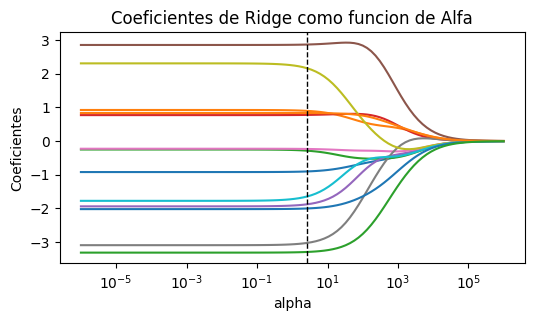

In [ ]:
alphas = np.logspace(-6, 6, 100)
coefficients_ridge = []

for alpha in alphas:
  identity_matrix = np.eye(X_normalized.shape[1])
  ridge_coeff = np.linalg.inv(X_normalized.T @ X_normalized + alpha * identity_matrix) @ X_normalized.T @ y
  coefficients_ridge.append(ridge_coeff)

# Visualización de los coeficientes de Ridge
plt.figure(figsize=(6, 3))
plt.plot(alphas, coefficients_ridge)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de Ridge como funcion de Alfa')
x_line = 10**0.424 # Alfa óptimo obtenido
plt.axvline(x=x_line, color='black', linestyle='--', linewidth=1)
plt.show()

En la gráfica anterior, se observa que el aumento de α reduce la magnitud de los coeficientes, limitando así la influencia de las variables en el modelo.

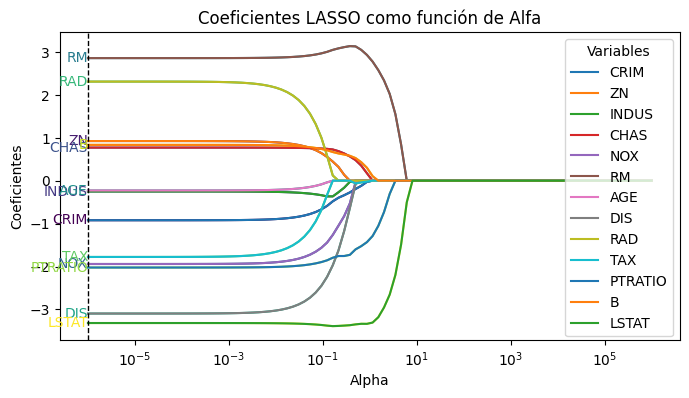

In [ ]:
coefficients_lasso = []

for alpha in alphas:
  lasso = Lasso(alpha=alpha, fit_intercept=False)
  lasso.fit(X_normalized, y)
  coefficients_lasso.append(lasso.coef_)

coefficients_lasso = np.array(coefficients_lasso)

num_lines = coefficients_lasso.shape[1]
colors = plt.cm.viridis(np.linspace(0, 1, num_lines)) # Usar colormap viridis

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 4))
# Graficar cada línea

for i in range(num_lines):
  line = ax.plot(alphas, coefficients_lasso[:, i], color=colors[i])
  # Añadir texto al inicio de cada línea
  y_pos = coefficients_lasso[0, i] # Primer valor del coeficiente para la línea i
  ax.text(alphas[0], y_pos, X_normalized.columns[i], color=colors[i],
          ha='right', va='center')

# Visualización de los coeficientes de LASSO
plt.plot(alphas, coefficients_lasso,label=X_normalized.columns)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coeficientes')
plt.title('Coeficientes LASSO como función de Alfa')
plt.legend(title="Variables")
x_line = 10**-6 # Alfa óptimo obtenido
plt.axvline(x=x_line, color='black', linestyle='--', linewidth=1)
plt.show()

En la gráfica anterior, observamos que el aumento de α disminuye la magnitud de los coeficientes, reduciendo así el efecto de las variables sobre el modelo LASSO. Si nos ubicarnos en el valor de α correspondiente a (10^0.2), obtendríamos una ecuación que incluye los valores de 3 de las 14 variables.

In [ ]:
# Ejecución de los modelos

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV # Encontrar los valores óptimos

ridge = Ridge()
parameters = {'alpha': np.logspace(-6, 6, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Alpha óptimo para Ridge:", ridge_cv.best_params_)
print("Mejor score para Ridge:", ridge_cv.best_score_)

np.log10(2.6560877829466896)

Alpha óptimo para Ridge: {'alpha': 8.111308307896872}
Mejor score para Ridge: -24.617742491839323


0.42424242424242475

In [ ]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Alpha óptimo para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

np.log10(1e-06)

Alpha óptimo para LASSO: {'alpha': 1e-06}
Mejor score para LASSO: -24.67945967844935


-6.0

A pesar de encontrar un alpha óptimo, el modelo LASSO no proporciona un ajuste efectivo para este conjunto de datos, dado el bajo rendimiento predictivo (con
𝑅^2 negativo). Esto sugiere que el modelo no logra capturar la variabilidad de los datos de manera adecuada

In [ ]:
elastic_net = ElasticNet()
parameters_en = {'alpha': np.logspace(-6, 6, 100), 'l1_ratio': np.linspace(0.01, 1, 25)}
elastic_net_cv = GridSearchCV(elastic_net, parameters_en, scoring='neg_mean_squared_error', cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

print("Mejores parámetros para Elastic-Net:", elastic_net_cv.best_params_)
print("Mejor score para Elastic-Net:", elastic_net_cv.best_score_)

np.log10(0.007564633275546291)

Mejores parámetros para Elastic-Net: {'alpha': 0.02310129700083158, 'l1_ratio': 0.01}
Mejor score para Elastic-Net: -24.619161678490666


-2.121212121212121

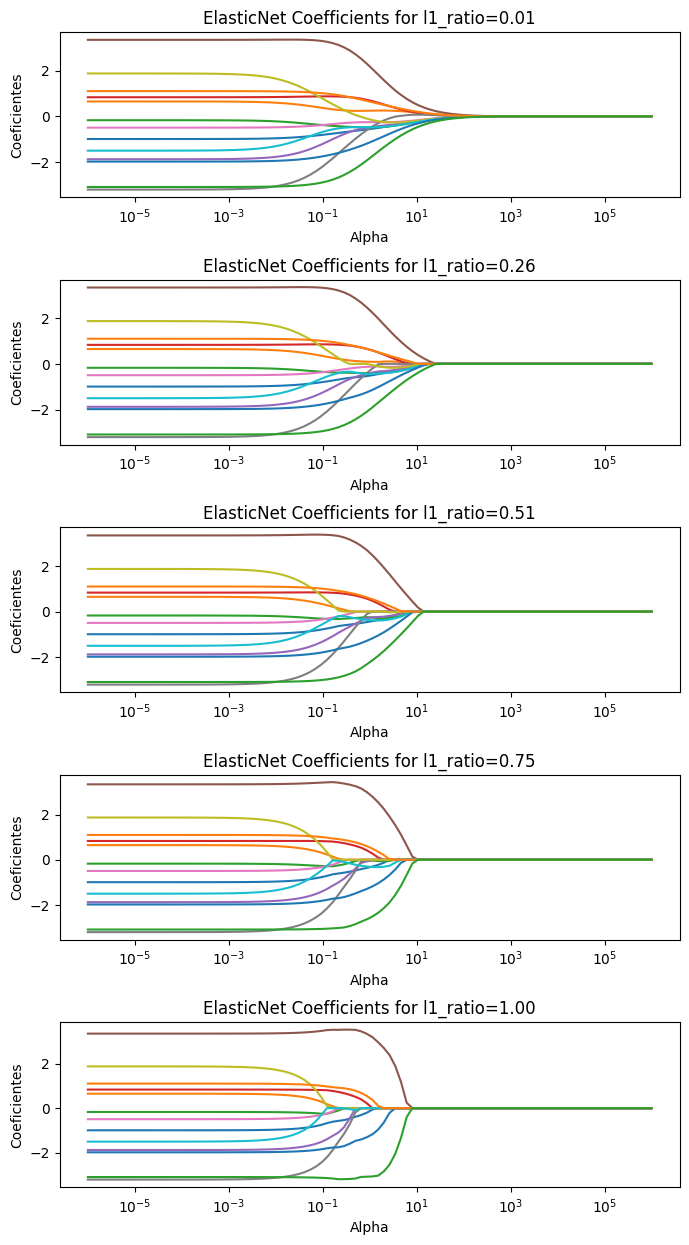

In [ ]:
# Definir los valores de alpha y l1_ratio

alphas = np.logspace(-6, 6, 100)
l1_ratios = np.linspace(0.01, 1.0, 5) # 5 diferentes l1_ratios para demostración

# Crear subplots
fig, axes = plt.subplots(nrows=len(l1_ratios), ncols=1, figsize=(8, 15))
fig.subplots_adjust(hspace=0.5) # Ajustar el espacio entre gráficos

# Reentrenar y recoger coeficientes para cada l1_ratio
for idx, l1_ratio in enumerate(l1_ratios):
  coefs = []
  for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
  coefs = np.array(coefs)

  # Graficar la evolución de los coeficientes para este l1_ratio en su subplot
  for i in range(coefs.shape[1]): # Asumiendo que tienes más de un coeficiente
    axes[idx].plot(alphas, coefs[:, i], label=f'Feature {i+1}')
    axes[idx].set_xscale('log')
    axes[idx].set_xlabel('Alpha')
    axes[idx].set_ylabel('Coeficientes')
    axes[idx].set_title(f'ElasticNet Coefficients for l1_ratio={l1_ratio:.2f}')

plt.show()

En la gráfica observamos que, al aumentar el l1_ratio, se incrementa la eliminación de los coeficientes de las variables, ya que se da más importancia a la regularización 𝐿1

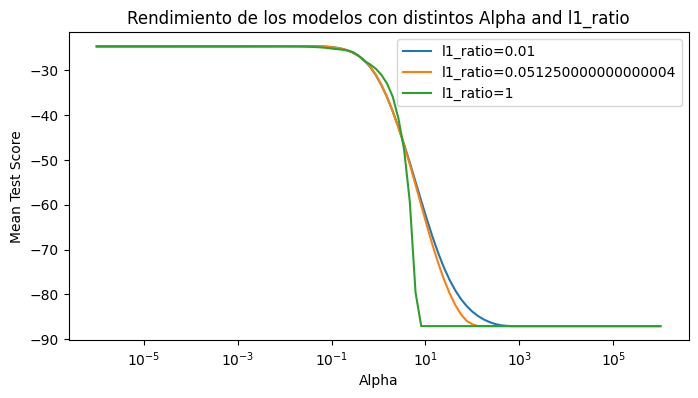

In [ ]:
# Convertir los resultados a un DataFrame
results = pd.DataFrame(elastic_net_cv.cv_results_)

# Visualización
plt.figure(figsize=(8, 4))

for l1_ratio in [0.01, 0.051250000000000004, 1]:
  subset = results[results['param_l1_ratio'] == l1_ratio]
  plt.plot(subset['param_alpha'], subset['mean_test_score'], label=f'l1_ratio={l1_ratio}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Rendimiento de los modelos con distintos Alpha and l1_ratio')
plt.legend()
plt.show()

Al hacer las particiones, observamos lo siguiente:

Un l1_ratio de 1 actúa como Lasso, aplicando solo penalización L1.

Un l1_ratio de 0 actúa como Ridge, aplicando solo penalización L2.

Valores intermedios combinan ambas penalizaciones."

In [ ]:
# Coeficientes de Ridge
coefficients_ridge = ridge_cv.best_estimator_.coef_
# Coeficientes de LASSO
coefficients_lasso = lasso_cv.best_estimator_.coef_
# Coeficientes de Elastic-Net
coefficients_elastic_net = elastic_net_cv.best_estimator_.coef_

print(f"Coeficientes de Ridge: {coefficients_ridge}")
print(f"Coeficientes de LASSO: {coefficients_lasso}")
print(f"Coeficientes de Elastic-Net: {coefficients_elastic_net}")

Coeficientes de Ridge: [-0.93538544  0.54922663 -0.25919516  0.8498892  -1.68140872  3.3518485
 -0.46665993 -2.92401636  1.46845676 -1.16052231 -1.91785053  1.0792639
 -3.04932522]
Coeficientes de LASSO: [-0.99346986  0.64824098 -0.17191961  0.83290742 -1.87838893  3.34244037
 -0.49637979 -3.20611059  1.87208586 -1.502725   -1.9811072   1.10044891
 -3.09093166]
Coeficientes de Elastic-Net: [-0.92822278  0.5375953  -0.26796691  0.85149579 -1.65669547  3.35195523
 -0.4623413  -2.88752544  1.42306856 -1.12432758 -1.90980163  1.07624585
 -3.04363386]


In [ ]:
# Obtener el intercepto de cada modelo
ridge_intercept = ridge_cv.best_estimator_.intercept_
lasso_intercept = lasso_cv.best_estimator_.intercept_
elastic_net_intercept = elastic_net_cv.best_estimator_.intercept_

print("Ridge Intercept:", ridge_intercept)
print("Lasso Intercept:", lasso_intercept)
print("Elastic Net Intercept:", elastic_net_intercept)

Ridge Intercept: 22.796534653465347
Lasso Intercept: 22.796534653465347
Elastic Net Intercept: 22.796534653465347


### Ecuación ajustada de regresión del modelo RIDGE.

$$y = 22.7965 -0.99 *x_1 +0.66 *x_2 +0.23 *x_3 +0.73 *x_4 -1.95 *x_5 +3.16 *x_6 -0.18 *x_7 -2.99 *x_8 +2.09 *x_9 -1.61 *x_{10} -2.02 *x_{11} +1.12 *x_{12} -3.58 *x_{13}$$


---

### Ecuación ajustada de regresión del modelo LASSO.

$$y = 22.7965 -1.01 *x_1 +0.70 *x_2 +0.28 *x_3 +0.72 *x_4 -2.02 *x_5 +3.14 *x_6 -0.18 *x_7 -3.08 *x_8 +2.26 *x_9 -1.76 *x_{10} -2.04 *x_{11} +1.13 *x_{12} -3.61 *x_{13}$$


---

### Ecuación ajustada de regresión del modelo ELASTIC NET.

$$y = 22.7965 -0.98 *x_1 +0.65 *x_2 +0.21 *x_3 +0.73 *x_4 -1.93 *x_5 +3.16 *x_6 -0.18 *x_7 -2.98 *x_8 +2.05 *x_9 -1.57 *x_{10} -2.01 *x_{11} +1.12 *x_{12} -3.58 *x_{13}$$

In [ ]:
# Para la comparación entre los modelos para decidir cual es mejor que otro, podemos usar las metrica de error.

y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
y_pred_elastic_net = elastic_net_cv.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("RMSE Ridge:", rmse_ridge)
print("RMSE LASSO:", rmse_lasso)
print("RMSE Elastic-Net:", rmse_elastic_net)

RMSE Ridge: 5.003546184170533
RMSE LASSO: 4.999938819624807
RMSE Elastic-Net: 5.004247911155486


Los tres modelos (Ridge, LASSO y Elastic-Net) tienen un rendimiento muy similar, dado que sus errores cuadráticos medios (RMSE) son prácticamente iguales. Esto sugiere que ninguno de los modelos tiene una ventaja significativa sobre los otros en este caso específico.

# **2.0 YearPredictionMSD**

In [ ]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np



data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip',
                   header= None)

data.head()


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:



# Dividimos el conjunto de datos en las variables explicativas X y la varaible Objetivo y. convirtiendolos en arreglos
y = data[0].values
X = data.drop(0,axis=1).values

# estandarizacion de la Carateristicas
scalerX = StandardScaler()
scalerX.fit(X)

X = scalerX.transform(X)

# Aplicacion del Modelo
modelo_lasso= Lasso(alpha =1.0, fit_intercept = True)
modelo_lasso.fit(X, y)
modelo_lasso.coef_.flatten()



array([ 1.68710302, -0.        , -0.63794543,  0.        ,  0.        ,
       -0.86141637,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.29605047,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.52770251,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.00232748,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [ ]:

nonzero =[]
for i, value in enumerate(modelo_lasso.coef_):
    if value != 0:
        nonzero.append(i)

nonzero

[0, 2, 5, 13, 19, 39]

In [ ]:
import statsmodels.api as sm

X_desing = sm.add_constant(X[:, nonzero])

model = sm.OLS(y, X_desing)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                 1.550e+04
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:53:38   Log-Likelihood:            -1.9210e+06
No. Observations:              515345   AIC:                         3.842e+06
Df Residuals:                  515338   BIC:                         3.842e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1998.3971      0.014   1.43e+05      0.000    1998.370    1998.425
x1             3.3157      0.016    201.129      0.000       3.283       3.348
x2            -1.1401      0.016    -71.044      0.000      -1.172      -1.109
x3            -2.1468      0.017   -122.985      0.000      -2.181      -2.113
x4             1.3149      0.017     75.287      0.000       1.281       1.349
x5             2.0349      0.020    101.834      0.000       1.996       2.074
x6            -0.6554      0.014    -45.739      0.000      -0.683      -0.627
==============================================================================
Omnibus:                   133822.731   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340990.112
Skew:                          -1.422   Prob(JB):                         0.00
Kurtosis:                       5.792   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.2 Conclusiones

1. La estadística F es 15,500 con una probabilidad (p-valor) de 0.00, indicando que el modelo en general es estadísticamente significativo y al menos una de las variables independientes tiene una relación significativa con la variable objetivo.

2. Jarque-Bera (JB) y Prob(JB):  p-valor de 0.00, confirma que los residuos no siguen una distribución normal.

3. Durbin-Watson: Indica autocorrelación en los residuos. Un valor de 0.652 sugiere una correlación positiva,
 lo cual podría indicar problemas de independencia en los residuos

En general  aunque el modelo es estadisticamente significativo su capacidad de de explicacion es baja  ya que el R2 es bajo
adicionalmente tiene problemas de autocorrelacion y de normailidad.

# **3.0 ElasticNet para selección de variables California Housing**

## **3.1 Analisis exploratorio de datos**

In [ ]:
!pip install update matplotlib

In [ ]:
!pip install basemap

In [ ]:
!pip install basemap-data-hires

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as img

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

from sklearn.datasets import fetch_california_housing

### Carga de datos

In [ ]:


# Cargar el conjunto de datos
california_housing = fetch_california_housing()

# Explorar el conjunto de datos
print(california_housing.DESCR)  # Descripción del conjunto de datos
print(california_housing.data.shape)  # Forma de los datos (número de muestras, número de características)
print(california_housing.feature_names)  # Nombres de las características
print(california_housing.target)  # Valores objetivo (precios de las viviendas)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Análisis Descriptivo de Datos

In [ ]:
#cargamos los datos en uns estructura de Dataframe
ch_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
ch_target = pd.DataFrame(california_housing.target, columns=['MedHouseValue'])

In [ ]:
#Describir la variable objetivo
ch_target.describe()

,MedHouseValue
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [ ]:
#Describir las variables explicativas
ch_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
#Encontrar los nulos
ch_data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


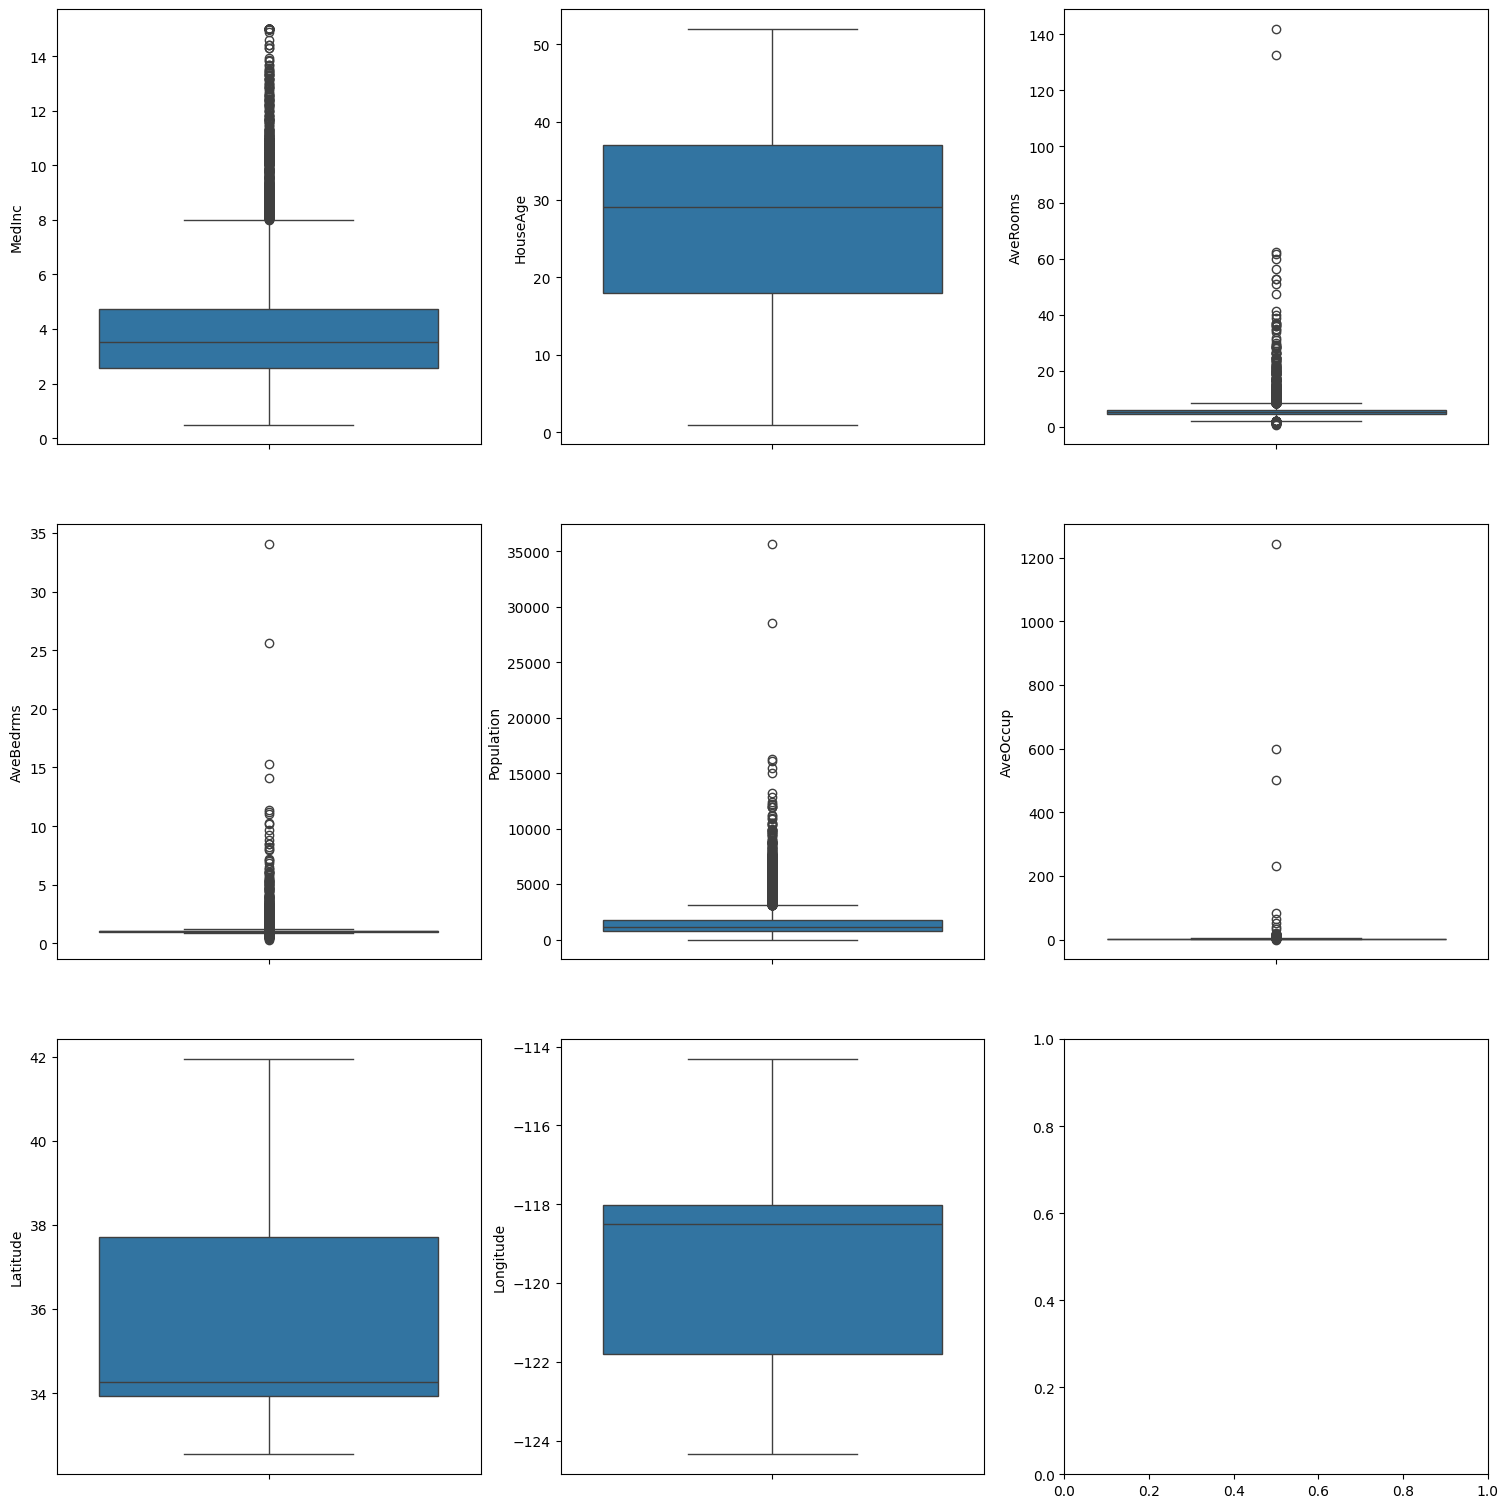

In [ ]:
# Boxplot para identificar outliers
numerical_features = ch_data.select_dtypes(include=[np.number])

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k,v in numerical_features.items():
    sns.boxplot(y=k, data=numerical_features, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

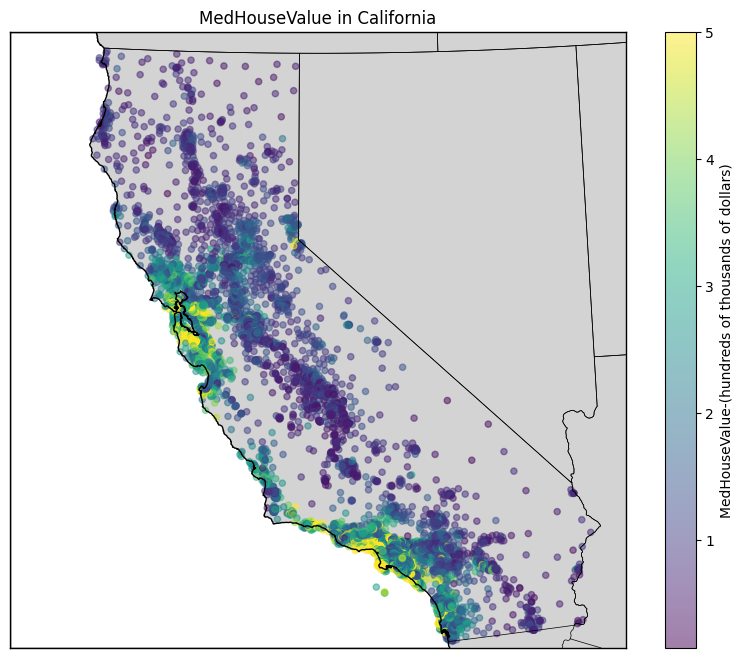

In [ ]:
# Observar las ubicacoines de las casas por latitud y longitud segun el previo de venta promedio
# Crear la figura y el mapa base
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='h',
            width=1.1E6, height=1.1E6,
            lat_0=37.4, lon_0=-119.6,
            area_thresh=10000.)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents(color='lightgray')
m.drawmapboundary()

# Convertir los datos de latitud y longitud a coordenadas de proyección
x, y = m(ch_data['Longitude'], ch_data['Latitude'])

# Crear el scatter plot
m.scatter(x, y, s=20, c=ch_target['MedHouseValue'], cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='MedHouseValue-(hundreds of thousands of dollars)')

plt.title('MedHouseValue in California')
plt.show()

### Correlación de Datos

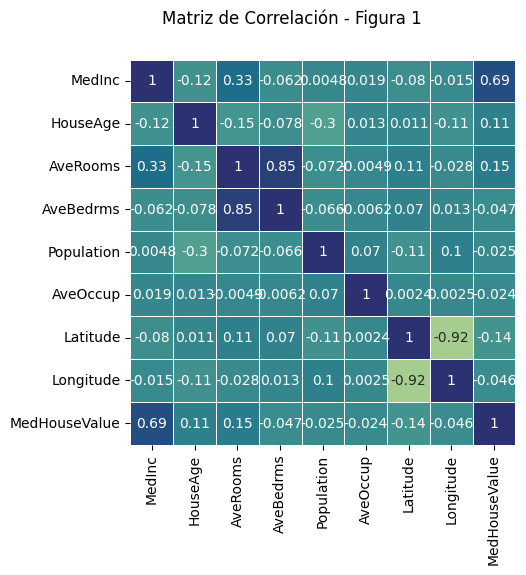

In [ ]:
#Explorar la correlaciones de las variables

corr_matrix_pearson = pd.concat([ch_data,ch_target],axis=1).corr(method='pearson')

figure,axes = plt.subplots(figsize=(25,5))
figure.suptitle('Matriz de Correlación - Figura 1')

sns.heatmap(corr_matrix_pearson,annot=True,cmap='crest',linecolor = 'white',linewidth=.5,cbar=False,square=True)

plt.show()

Claramente existe una correlacion lineal positiva entre la longitud y la latitud, esto puede deberse a la forma especifica del estado o a la forma en que se realizo el senso. Para estos casos usar ElasticNet es ideal ya que es util para manejar la multicolinearidad de las variables.

## **3.2 Implementación de ElasticNet**

### Estandarización de datos

In [ ]:
#Procedemos a escalar las variables
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Separar los datset para un protocolo hold out
ch_data_scaled_train, ch_data_scaled_test,ch_target_scaled_train, ch_target_scaled_test = train_test_split(
                                                                                        ch_data, ch_target, test_size=0.2, random_state=42)

#Crear los objetos scaler
scaler_data = StandardScaler()
scaler_target = StandardScaler()


# Ajustar el scaler a los datos de entrenamiento
scaler_data.fit(ch_data_scaled_train)
scaler_target.fit(ch_target_scaled_train)

# Transformar los datos de entrenamiento y test
ch_data_scaled_train = scaler_data.transform(ch_data_scaled_train)
ch_target_scaled_train = scaler_target.transform(ch_target_scaled_train)

ch_data_scaled_test = scaler_data.transform(ch_data_scaled_test)
ch_target_scaled_test = scaler_target.transform(ch_target_scaled_test)


#Transformamos en dataset
ch_data_scaled_train = pd.DataFrame(ch_data_scaled_train,columns = ch_data.columns)
ch_target_scaled_train = pd.DataFrame(ch_target_scaled_train,columns = ch_target.columns)

ch_data_scaled_test = pd.DataFrame(ch_data_scaled_test,columns = ch_data.columns)
ch_target_scaled_test = pd.DataFrame(ch_target_scaled_test,columns = ch_target.columns)


In [ ]:
from sklearn.linear_model import ElasticNet

### Función para comprobar correlaciones

In [ ]:
#Definimos una funcion para comprobar comprobar las correlaciones

def high_correlation(data,threshold = 0.6):
  max_correlation = np.tril(data.corr().fillna(0).abs().values, k=-1).max()
  return max_correlation > threshold

### Evaluación de parametros alpha y l1_ratio

In [ ]:
#Evaluaremos alpa desde 0 a 1 en incrementos de 0.01
#Evaluaremos el l1 ratio desde 1 a 10 en incrementos de 0.01
alpa = 0
l1_ratio = np.linspace(0.01,1,10)
variables = ch_data_scaled_train.columns
results = []

for l1 in l1_ratio:
  alpha_inicial = alpa
  selected_variables = ch_data_scaled_train.columns
  while True:
    #Entrenar el modelo de ElasticNet
    elastic_net = ElasticNet(alpha = alpha_inicial,
                             l1_ratio = l1,
                             max_iter = 1000)
    elastic_net.fit(ch_data_scaled_train[selected_variables],ch_target_scaled_train)

    # Predict values from the test dataset
    elastic_net_pred = elastic_net.predict(ch_data_scaled_test[selected_variables])
    mse = mean_squared_error(ch_target_scaled_test, elastic_net_pred)

    #Obtener las variables selecionadas
    coef_variables = pd.DataFrame(
        {'Variables': selected_variables,
         'Coeficientes': elastic_net.coef_})
    non_zero_coef = coef_variables[coef_variables['Coeficientes'] != 0]
    selected_variables = non_zero_coef['Variables'].tolist()

    if not selected_variables:
      break

    #comprobar las correlaciones
    ch_data_scaled_selected = ch_data_scaled_train[selected_variables]

    if not high_correlation(ch_data_scaled_selected):




      print(f'Alpha: {alpha_inicial}, L1 Ratio: {l1},mse: {mse}')
      results.append((alpha_inicial,l1,mse,selected_variables))
      break

    alpha_inicial+=0.01




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 5.5299999999999265, L1 Ratio: 0.01,mse: 0.8542580774403729


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.5300000000000002, L1 Ratio: 0.12,mse: 0.5683114984219477


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.2700000000000001, L1 Ratio: 0.23,mse: 0.5252887219201734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.18000000000000002, L1 Ratio: 0.34,mse: 0.5114586502417022


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.13999999999999999, L1 Ratio: 0.45,mse: 0.5066729974686726


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.10999999999999999, L1 Ratio: 0.56,mse: 0.5026182178439279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.09, L1 Ratio: 0.67,mse: 0.5000829145733879


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.08, L1 Ratio: 0.78,mse: 0.49966838034571215


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.07, L1 Ratio: 0.89,mse: 0.4986955776082892


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.199e+03, tolerance: 1.651e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha: 0.060000000000000005, L1 Ratio: 1.0,mse: 0.4972124542795612


In [ ]:
results_df = pd.DataFrame(results,columns = ['Alpha','L1 Ratio','MSE','Variables'])
results_df.sort_values(by = 'MSE',ascending = True,inplace = True)
results_df

,Alpha,L1 Ratio,MSE,Variables
9,0.06,1.00,0.497212,"[MedInc, HouseAge, Latitude]"
8,0.07,0.89,0.498696,"[MedInc, HouseAge, Latitude]"
7,0.08,0.78,0.499668,"[MedInc, HouseAge, Latitude]"
6,0.09,0.67,0.500083,"[MedInc, HouseAge, Latitude]"
5,0.11,0.56,0.502618,"[MedInc, HouseAge, Latitude]"
4,0.14,0.45,0.506673,"[MedInc, HouseAge, Latitude]"
3,0.18,0.34,0.511459,"[MedInc, HouseAge, Latitude]"
2,0.27,0.23,0.525289,"[MedInc, HouseAge, Latitude]"
1,0.53,0.12,0.568311,"[MedInc, HouseAge, Latitude]"
0,5.53,0.01,0.854258,"[MedInc, HouseAge, Latitude]"


El mejor modelo resulto ser ElasticNet con alpha en 0.06 y el l1_ratio en 1, esto es equivalente a tener unapenalizaci[on l1 completamente lo que hace que elasticnet se comporte como una regresión Lasso. Esto es logico pues lo que buscamos es la selección de variable donde Lasso se destaca por sobre ridge.

# **4.0 Casos de Dengue en el departamento de Antioquia**

---



## **4.1 Analisis exploratorio de datos**

### Importacion de librerias

In [ ]:
import pandas as pd            # Para manipulación y análisis de datos
import numpy as np             # Para operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt # Para visualización de gráficos
import seaborn as sns          # Para gráficos estadísticos y de exploración de datos
from sklearn.model_selection import train_test_split # Para dividir datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Modelo Logit básico
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet # Modelos logísticos penalizados
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # Para evaluar modelos
from sklearn.preprocessing import StandardScaler    # Para normalizar datos
from sklearn.model_selection import GridSearchCV    # Para optimizar hiperparámetros
from sklearn.linear_model import LogisticRegressionCV # Para optimizar hiperparámetros con CV
from sklearn.pipeline import make_pipeline # Para crear tuberías de procesamiento de datos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
# Clonar el repositorio
!git clone https://github.com/MarioSolano98/actividad-evaluativa3-AC.git

fatal: destination path 'actividad-evaluativa3-AC' already exists and is not an empty directory.


### Inspección primeras filas

In [ ]:
# Cargar el archivo de datos
data_path = '/content/actividad-evaluativa3-AC/Dengue_Data.xlsx'
data = pd.read_excel(data_path)
data.head()

,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


###Información general del DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   area_.1                        50397 non-null  object        
 5   area_.2                        50397 non-null  object        
 6   ocupacion_                     50397 non-null  object        
 7   per_etn_                       50397 non-null  object        
 8   gp_discapa                     49661 non-null  object        
 9   gp_desplaz                     49676 non-null  object        
 10  gp_migrant                     49696 non-null  object        
 11  gp_carcela     

### Estadísticas descriptivas de las variables numéricas

In [ ]:
data.describe()

,edad_,fec_con_,ini_sin_,tpo_consulta(consulta-inicio),fec_hos_,tpo_deterioro(hosp-consul)
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


### Visualización de histogramas para variables numéricas

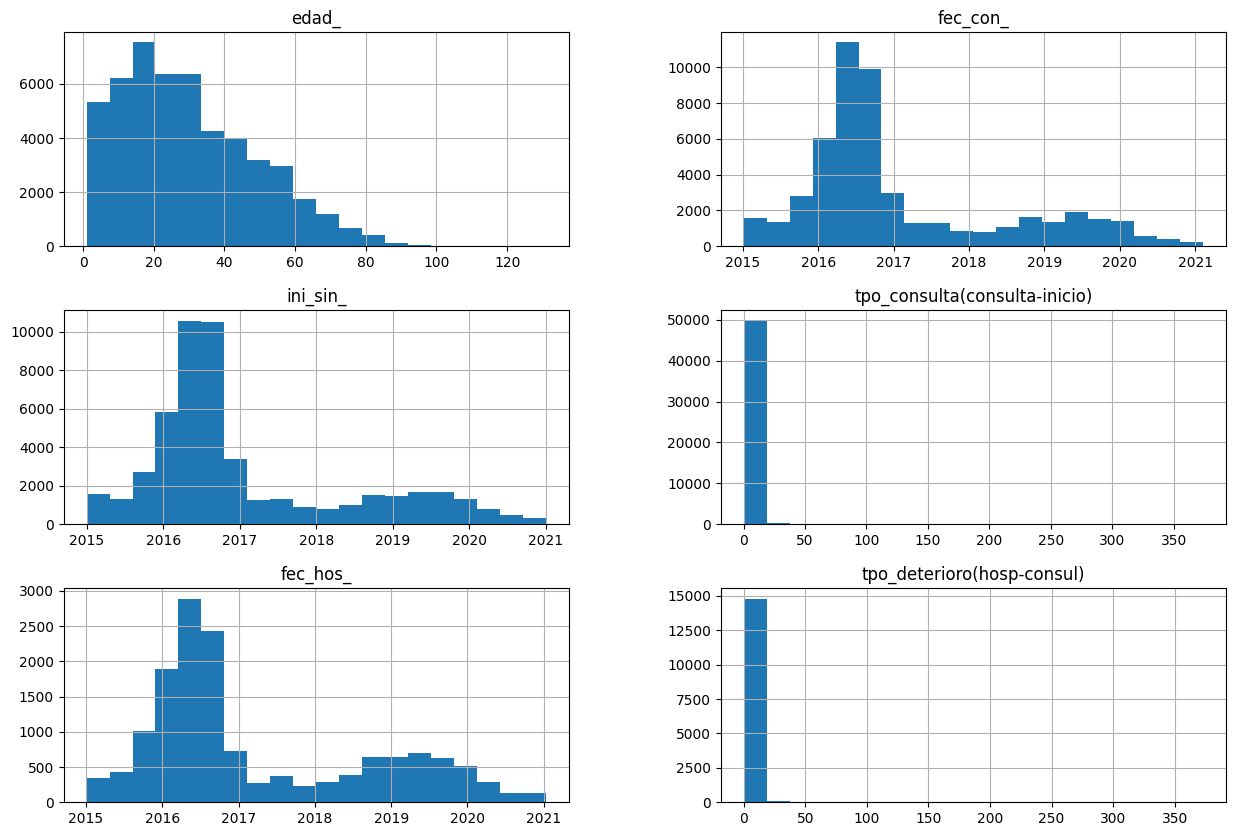

In [ ]:
data.hist(bins=20, figsize=(15, 10))
plt.show()

###Visualización de histogramas para variables categoricas

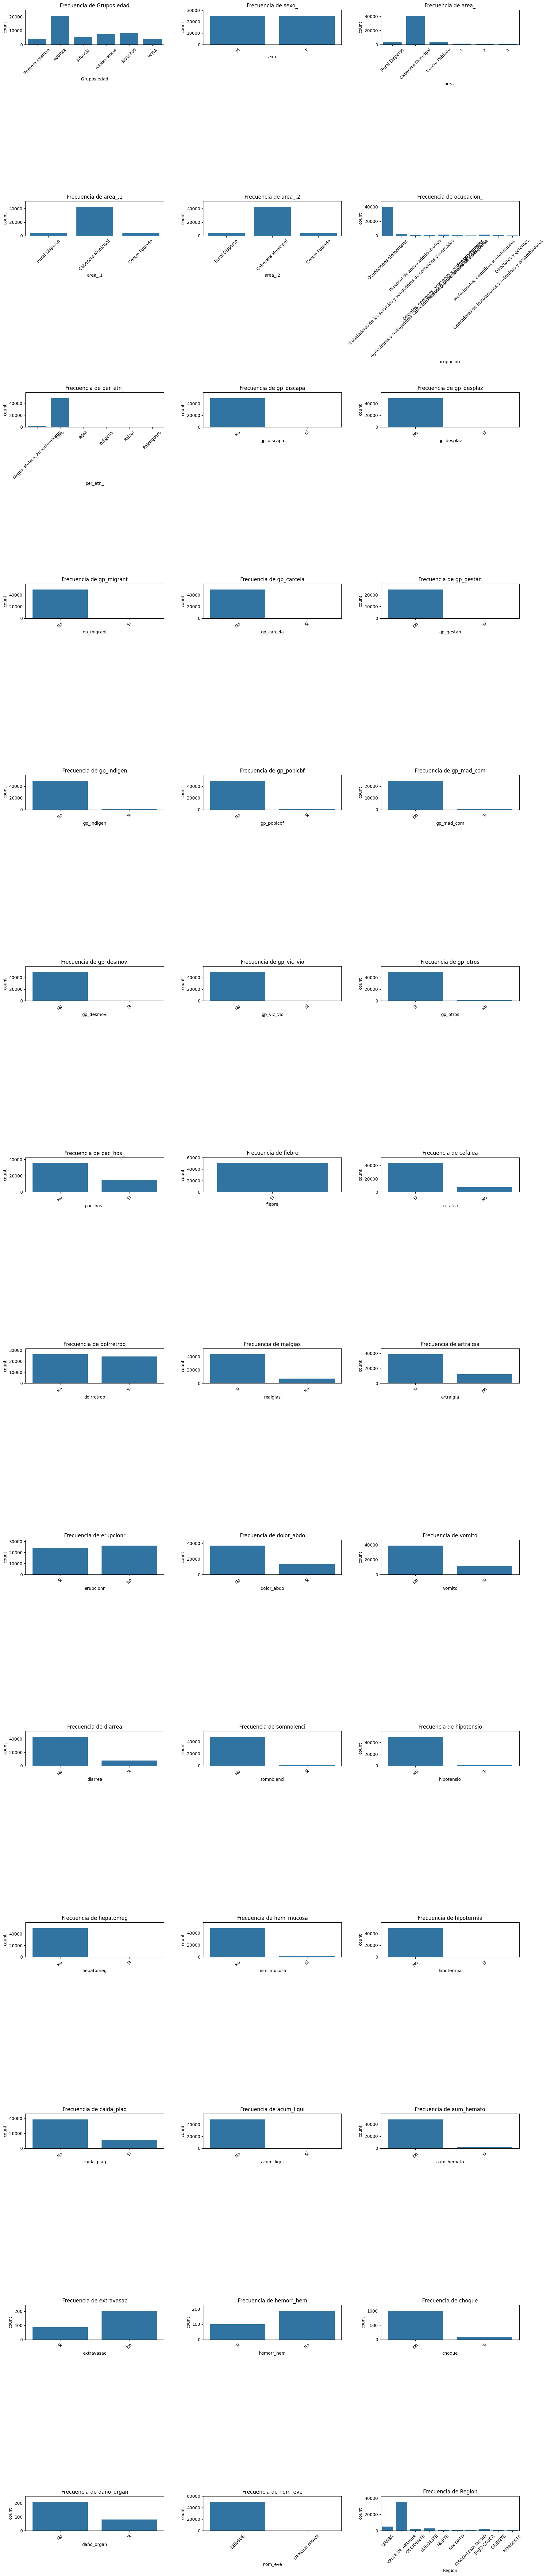

In [ ]:
# Selección de las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Configuración de subplots en grupos de tres
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6 * n_rows))

# Aplanar los ejes en una sola lista para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de barras para cada variable categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].tick_params(axis='x', rotation=45)
    # Ajuste del límite superior de ylim para que se vea más espaciado
    max_count = data[col].value_counts().max()
    axes[i].set_ylim(0, max_count * 1.2)  # Ajuste del límite superior al 120% del valor máximo

# Ocultar cualquier gráfico adicional en el subplot si hay un número impar de gráficos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuste del espaciado para evitar superposiciones
plt.tight_layout(h_pad=5)  # h_pad controla el espacio vertical entre gráficos
plt.show()

##**4.2 Preparación de los datos**

###Identificación de valores nulos.
Seleccionamos las columnas en las cuales los valores nulos representen mas del 50% del total de los datos

Columnas con más del 50% de valores nulos: ['gp_gestan', 'gp_mad_com', 'fec_hos_', 'tpo_deterioro(hosp-consul)', 'extravasac', 'hemorr_hem', 'choque', 'daño_organ']


<ipython-input-58-37270eb7a624>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


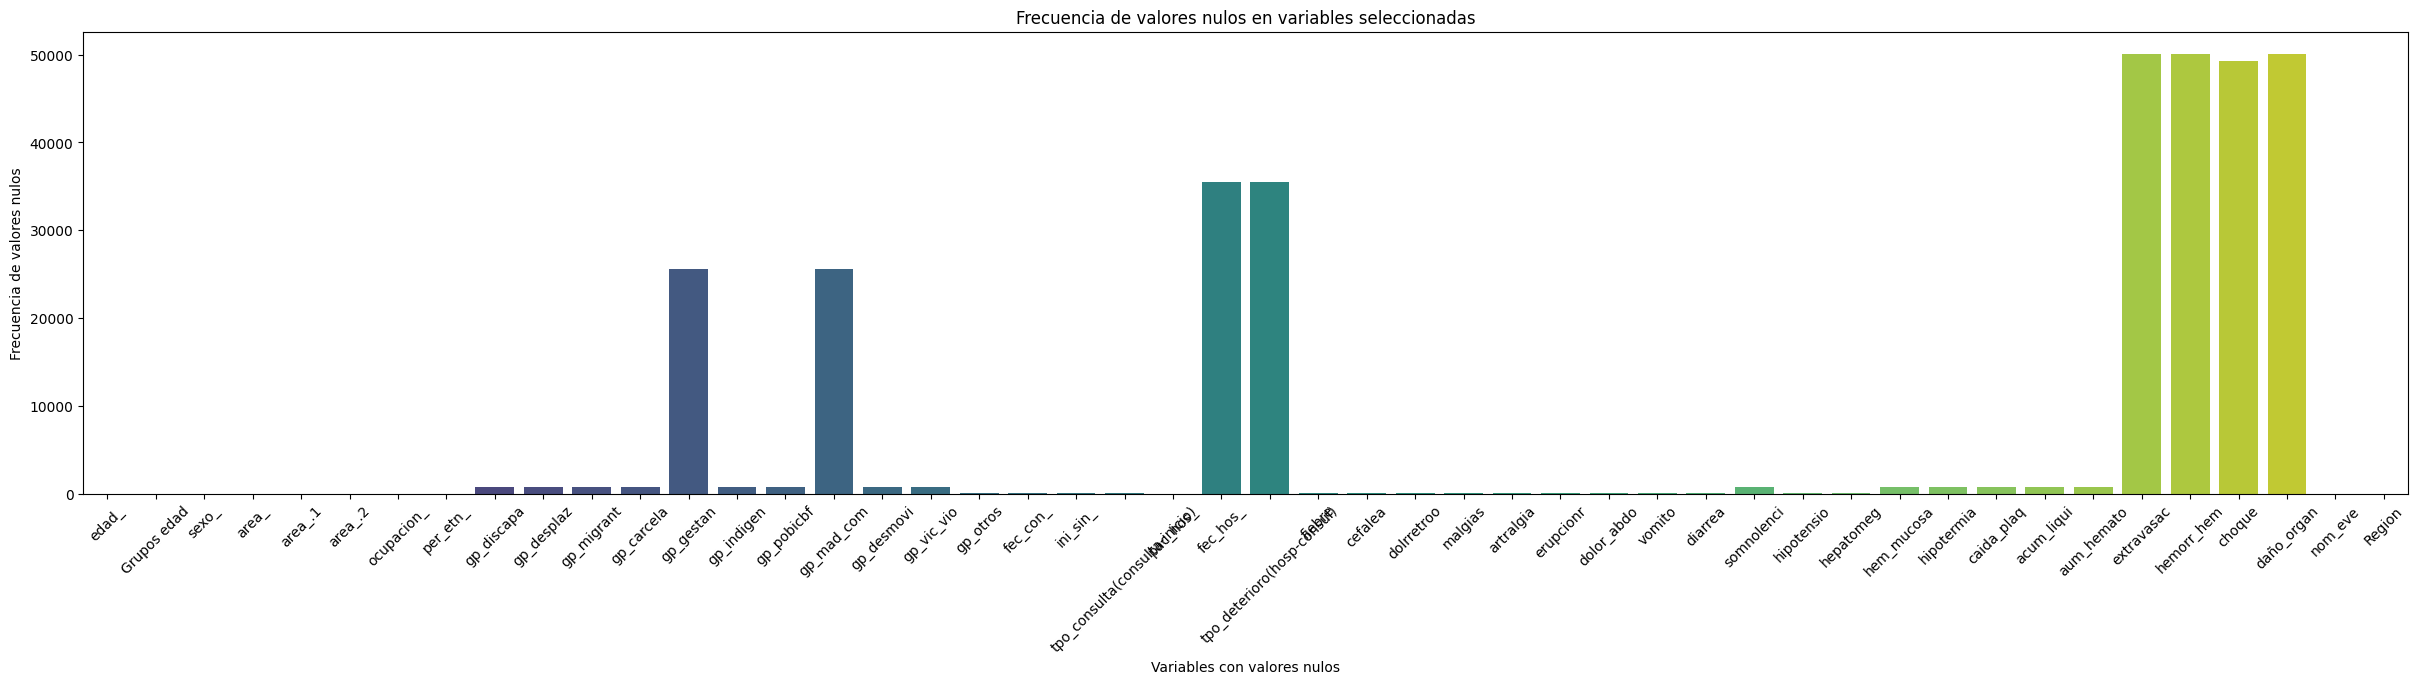

In [ ]:
# Calcular el umbral del 50% en función del número de filas
threshold = len(data) * 0.5

# Contar los valores nulos en cada columna y filtrar aquellas que superen el umbral del 50%
null_counts = data.isnull().sum()
high_null_columns = null_counts[null_counts > threshold].index.tolist()

# Mostrar las columnas que tienen más del 50% de valores nulos
print("Columnas con más del 50% de valores nulos:", high_null_columns)

# Gráfico de barras solo para columnas con valores nulos
plt.figure(figsize=(30, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Variables con valores nulos")
plt.ylabel("Frecuencia de valores nulos")
plt.title("Frecuencia de valores nulos en variables seleccionadas")
plt.show()

###Eliminación de columnas innecesarias según datos faltantes

In [ ]:
data_filtered = data.drop(columns=high_null_columns)
data_filtered

,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,No,No,No,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,Sí,Sí,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,No,No,No,No,No,Sí,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,Sí,No,Sí,No,Sí,DENGUE GRAVE,URABA
50395,24,Juventud,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,Sí,Sí,No,No,No,Sí,Sí,No,DENGUE GRAVE,BAJO CAUCA


###Eliminación de columnas repetidas

In [ ]:
#Eliminamos las columnas repetidas en este caso las de "área_"

# Eliminar las columnas 'area_' y 'area_.1'
data_filtered = data_filtered.drop(columns=['area_', 'area_.1'], errors='ignore')

# Renombrar la columna 'area_.2' a 'area_'
data_filtered = data_filtered.rename(columns={'area_.2': 'area_'})

data_filtered


,edad_,Grupos edad,sexo_,area_,ocupacion_,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,No,No,No,No,No,No,No,No,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,DENGUE,URABA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,No,No,No,No,No,Sí,Sí,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,No,No,...,No,No,No,No,No,Sí,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,Rural Disperso,Ocupaciones elementales,Otro,No,No,No,No,...,No,Sí,Sí,Sí,No,Sí,No,Sí,DENGUE GRAVE,URABA
50395,24,Juventud,F,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,No,No,...,Sí,Sí,No,No,No,Sí,Sí,No,DENGUE GRAVE,BAJO CAUCA


###Transformación de variables categoricas a númericas

* No: 0
* Si: 1

Valores asignados a cada categoria:

Grupos edad:

*   Adolescencia: 0
*   Adultez: 1
*   Infancia: 2
*   Juventud: 3
*   Primera infancia: 4
*   Vejez: 5


sexo_:

* F (Femenino): 0
* M (Masculino): 1


area_:

* Cabecera Municipal: 0
* Centro Poblado: 1
* Rural Disperso: 2

nom_eve:

* DENGUE: 0
* DENGUE GRAVE: 1

In [ ]:
# Identificar columnas que contienen "No" o "Sí"
filtered_columns = [col for col in data_filtered.columns if data_filtered[col].astype(str).str.contains("No|Sí", case=False, na=False).any()]

# Cambiar "Sí" a 1 y "No" o nulos a 0 en las columnas identificadas
for col in filtered_columns:
    data_filtered[col] = data_filtered[col].apply(lambda x: 1 if str(x).strip().lower() == 'sí' else 0)

# Mostrar las primeras filas para verificar el resultado
data_filtered[filtered_columns].head()
data_filtered

,edad_,Grupos edad,sexo_,area_,ocupacion_,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DENGUE,0
1,27,Adultez,M,Cabecera Municipal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DENGUE,0
2,46,Adultez,F,Cabecera Municipal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DENGUE,0
3,35,Adultez,M,Cabecera Municipal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DENGUE,0
4,11,Infancia,M,Rural Disperso,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DENGUE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50392,6,Infancia,F,Cabecera Municipal,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,DENGUE GRAVE,0
50393,9,Infancia,F,Rural Disperso,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,DENGUE GRAVE,0
50394,17,Adolescencia,F,Rural Disperso,0,0,0,0,0,0,...,0,1,1,1,0,1,0,1,DENGUE GRAVE,0
50395,24,Juventud,F,Cabecera Municipal,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,DENGUE GRAVE,0


In [ ]:
#Convertimos las demas variables categoricas en numericas (Grupos edad, sexo_, area_, y nom_eve)
from sklearn.preprocessing import LabelEncoder

# Identificamos columnas categóricas que necesitan codificación
categorical_columns = data_filtered.select_dtypes(include=['object']).columns

# Aplicamos codificación de etiquetas a cada columna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le  # Guardamos el codificador para hacer referencia al mapeo más adelante si es necesario

# Muestra el marco de datos transformado y las asignaciones para cada columna codificada.
data_filtered.head(), {col: list(le.classes_) for col, le in label_encoders.items()}

(   edad_  Grupos edad  sexo_  area_  ocupacion_  per_etn_  gp_discapa  \
 0      4            4      1      2           0         0           0   
 1     27            1      1      0           0         0           0   
 2     46            1      0      0           0         0           0   
 3     35            1      1      0           0         0           0   
 4     11            2      1      2           0         0           0   
 
    gp_desplaz  gp_migrant  gp_carcela  ...  somnolenci  hipotensio  hepatomeg  \
 0           0           0           0  ...           0           0          0   
 1           0           0           0  ...           0           0          0   
 2           0           0           0  ...           0           0          0   
 3           0           0           0  ...           0           0          0   
 4           0           0           0  ...           0           0          0   
 
    hem_mucosa  hipotermia caida_plaq acum_liqui  aum_hemato

In [ ]:
data_filtered.head()

,edad_,Grupos edad,sexo_,area_,ocupacion_,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,nom_eve,Region
0,4,4,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  int64         
 2   sexo_                          50397 non-null  int64         
 3   area_                          50397 non-null  int64         
 4   ocupacion_                     50397 non-null  int64         
 5   per_etn_                       50397 non-null  int64         
 6   gp_discapa                     50397 non-null  int64         
 7   gp_desplaz                     50397 non-null  int64         
 8   gp_migrant                     50397 non-null  int64         
 9   gp_carcela                     50397 non-null  int64         
 10  gp_indigen                     50397 non-null  int64         
 11  gp_pobicbf     

## **4.3 Identificación de variables "Sociodemograficas" y "Clinicas"**

In [ ]:
# Identificar variables socio-demográficas y clínicas

# Listado de las columnas
columnas = data_filtered.columns

# Variables socio-demográficas (basadas en nombres típicos y el contenido inspeccionado)
variables_socio_demograficas = [
    'edad_', 'Grupos edad', 'sexo_', 'area_', 'ocupacion_', 'per_etn_',
    'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_indigen',
    'gp_pobicbf', 'gp_desmovi', 'gp_vic_vio', 'gp_otros', 'Region'
]

# Variables clínicas/médicas (basadas en nombres de síntomas y el contenido inspeccionado)
variables_clinicas = [
    'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr',
    'dolor_abdo', 'vomito', 'diarrea', 'somnolenci', 'hipotensio',
    'hepatomeg', 'hem_mucosa', 'hipotermia', 'caida_plaq', 'acum_liqui',
    'aum_hemato'
]

# Variable objetivo para el primer análisis (Dengue o Dengue Grave)
variable_objetivo_dengue = 'nom_eve'

# Variable objetivo para el segundo análisis (Hospitalización)
variable_objetivo_hospitalizacion = 'pac_hos_'

variables_socio_demograficas, variables_clinicas


(['edad_',
  'Grupos edad',
  'sexo_',
  'area_',
  'ocupacion_',
  'per_etn_',
  'gp_discapa',
  'gp_desplaz',
  'gp_migrant',
  'gp_carcela',
  'gp_indigen',
  'gp_pobicbf',
  'gp_desmovi',
  'gp_vic_vio',
  'gp_otros',
  'Region'],
 ['fiebre',
  'cefalea',
  'dolrretroo',
  'malgias',
  'artralgia',
  'erupcionr',
  'dolor_abdo',
  'vomito',
  'diarrea',
  'somnolenci',
  'hipotensio',
  'hepatomeg',
  'hem_mucosa',
  'hipotermia',
  'caida_plaq',
  'acum_liqui',
  'aum_hemato'])

##**4.4 Determinación de "DENGUE" / "DENGUE GRAVE", con variables sociodemográficas.**

### Despliegue de modelos y resultados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

variable_objetivo_dengue = 'nom_eve'

# Filtrar los datos para las variables relevantes
X = data_filtered[variables_socio_demograficas]
y = data_filtered[variable_objetivo_dengue]

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos con regularización
models = {
    'Logit': LogisticRegression(penalty=None, random_state=42), # Changed 'none' to None
    'Logit Ridge': LogisticRegression(penalty='l2', C=1.0, random_state=42),
    'Logit LASSO': LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=42),
    'Logit Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, random_state=42)
}

# Ajustar cada modelo y obtener los resultados
model_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {
        'model': model,
        'classification_report': report,
        'coefficients': model.coef_
    }

model_results


# Crear un DataFrame para almacenar los resultados de cada modelo
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0', 'Precision_1', 'Recall_1', 'F1_1'])

# Extraer métricas clave del reporte de clasificación de cada modelo
for model_name, results in model_results.items():
    report = results['classification_report']
    # Obtener las métricas de precisión, recall y F1 para cada clase (0 y 1)
    accuracy = report['accuracy']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']

    # Agregar los resultados al DataFrame using pd.concat
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Recall_0': recall_0,
        'F1_0': f1_0,
        'Precision_1': precision_1,
        'Recall_1': recall_1,
        'F1_1': f1_1
    }])], ignore_index=True)

results_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Logit,0.99418,0.99418,1.0,0.997081,0.0,0.0,0.0
1,Logit Ridge,0.99418,0.99418,1.0,0.997081,0.0,0.0,0.0
2,Logit LASSO,0.99418,0.99418,1.0,0.997081,0.0,0.0,0.0
3,Logit Elastic Net,0.99418,0.99418,1.0,0.997081,0.0,0.0,0.0


### Conclusiones y Análisis:

* Alta precisión general (0.99418): La precisión en todos los modelos es alta debido a la correcta clasificación de la clase mayoritaria (0 - "DENGUE"), mientras que ningún modelo logró clasificar correctamente la clase minoritaria (1 - "DENGUE GRAVE").

* Desequilibrio de clases: La clase 1 no fue predicha correctamente por ningún modelo, reflejando el desbalance en los datos y la dificultad de los modelos para captar patrones en la clase minoritaria sin ajustes adicionales.

* Regularización: Aunque se aplicaron penalizaciones (Ridge, LASSO y Elastic Net) para mejorar la estabilidad y selección de variables, no lograron mejorar la detección de la clase minoritaria.

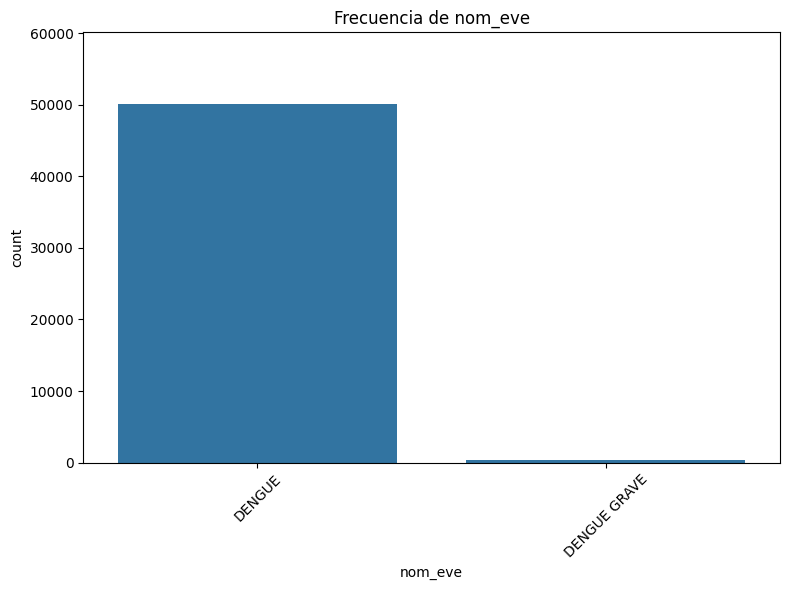

In [ ]:
# Crear el histograma de la variable 'nom_eve'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='nom_eve')
plt.title('Frecuencia de nom_eve')
plt.xticks(rotation=45)
plt.ylim(0, data['nom_eve'].value_counts().max() * 1.2)  # Ajuste del límite superior al 120% del valor máximo
plt.tight_layout()
plt.show()

### Resultados y comparación de coeficientes de modelos logisticos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


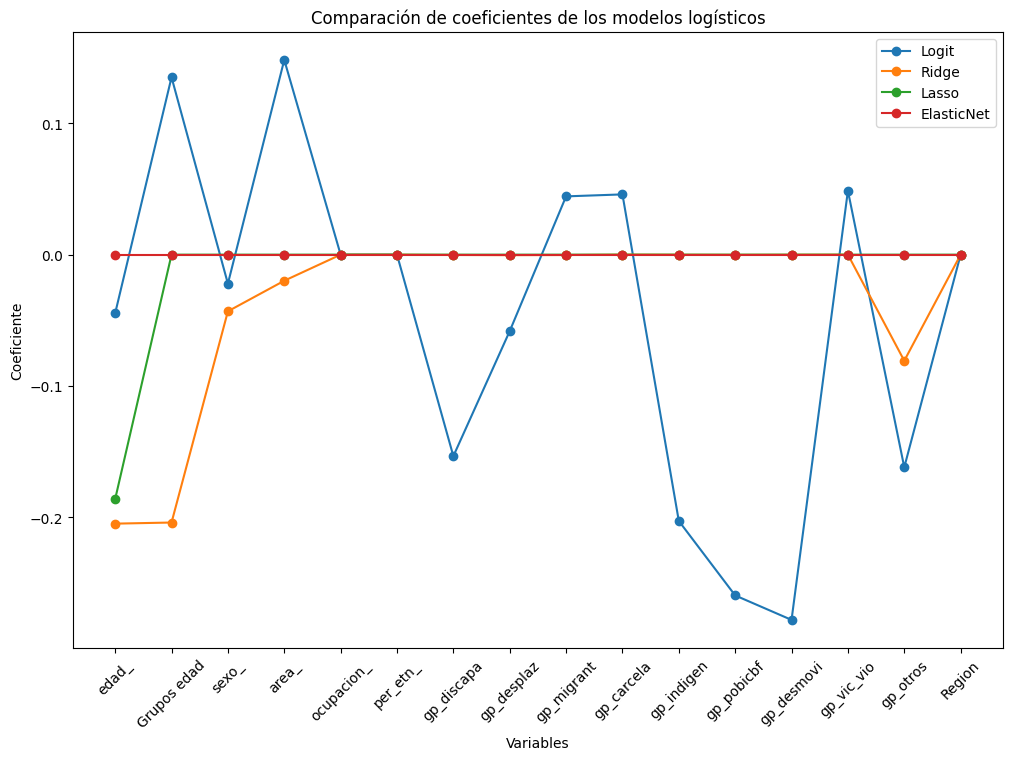

In [ ]:
# Definimos los modelos penalizados (Ridge, Lasso, ElasticNet) con validación cruzada para optimización de hiperparámetros
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', random_state=42)
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42)
enet_model = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.5], random_state=42)

# Ajustar los modelos
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

# Coeficientes de cada modelo
ridge_coef = ridge_model.coef_[0]
lasso_coef = lasso_model.coef_[0]
enet_coef = enet_model.coef_[0]

# Obtener los coeficientes del modelo Logit del diccionario model_results
logit_coef = model_results['Logit']['model'].coef_[0] # Added this line to get logit_coef

# Graficar los coeficientes de cada modelo para comparar
models = ['Logit', 'Ridge', 'Lasso', 'ElasticNet']
coefficients = [logit_coef, ridge_coef, lasso_coef, enet_coef]

# Graficar los coeficientes
fig, ax = plt.subplots(figsize=(12, 8))
for idx, coef in enumerate(coefficients):
    ax.plot(X.columns, coef, marker='o', label=models[idx])
ax.set_xlabel("Variables")
ax.set_ylabel("Coeficiente")
ax.set_title("Comparación de coeficientes de los modelos logísticos")
ax.legend()
plt.xticks(rotation=45)
plt.show()

### Evolucion de coeficientes

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

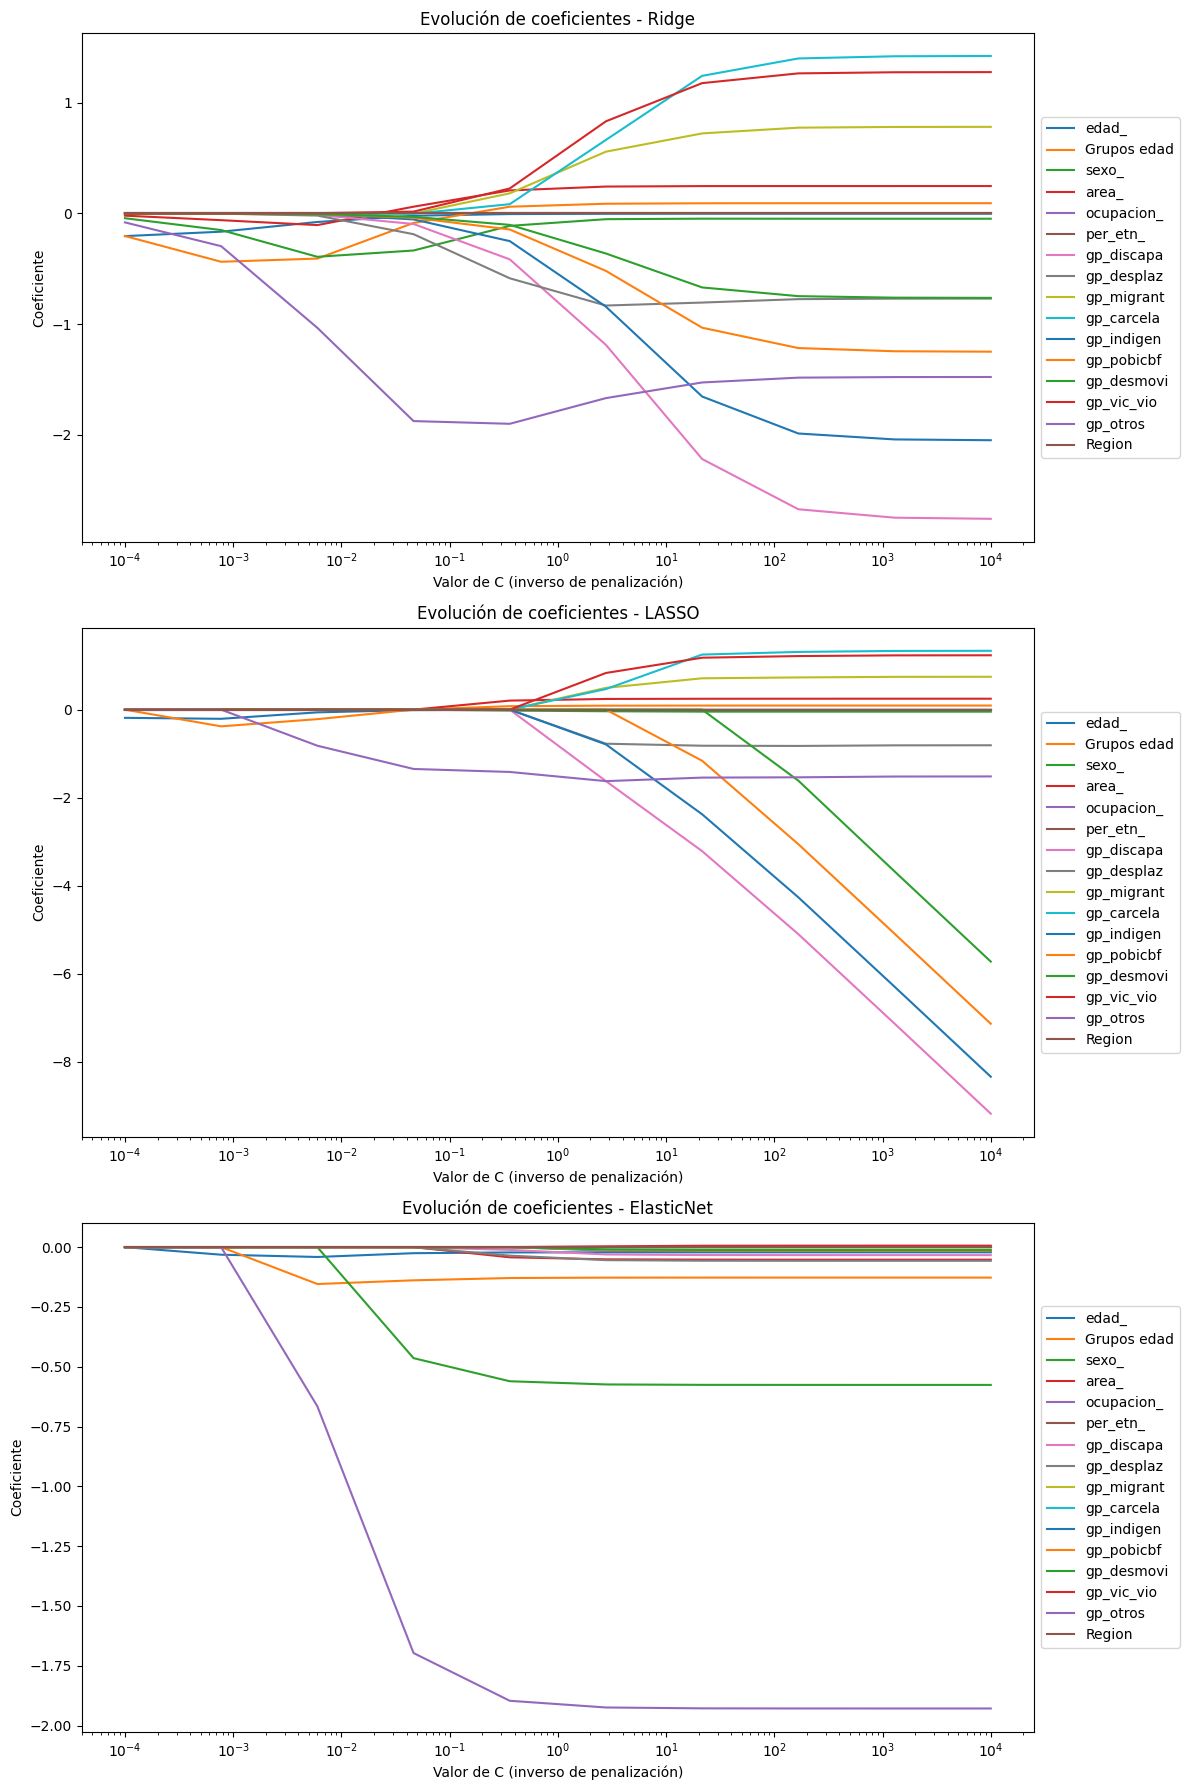

In [ ]:
# Generar una serie de valores de C para la regularización (inverso de la penalización)
C_values = np.logspace(-4, 4, 10)

# Definir diccionario para almacenar los coeficientes
coefficients_ridge = []
coefficients_lasso = []
coefficients_enet = []

# Ajuste de modelos con diferentes valores de C para Ridge, LASSO y ElasticNet
for C in C_values:
    # Modelo Ridge
    ridge = LogisticRegression(penalty='l2', C=C, solver='liblinear', random_state=42)
    ridge.fit(X_train, y_train)
    coefficients_ridge.append(ridge.coef_[0])

    # Modelo LASSO
    lasso = LogisticRegression(penalty='l1', C=C, solver='liblinear', random_state=42)
    lasso.fit(X_train, y_train)
    coefficients_lasso.append(lasso.coef_[0])

    # Modelo ElasticNet (50% L1, 50% L2)
    enet = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=C, solver='saga', random_state=42, max_iter=100)
    enet.fit(X_train, y_train)
    coefficients_enet.append(enet.coef_[0])

# Convertir listas a arreglos numpy para graficar
coefficients_ridge = np.array(coefficients_ridge)
coefficients_lasso = np.array(coefficients_lasso)
coefficients_enet = np.array(coefficients_enet)

# Graficar la evolución de coeficientes para cada modelo
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico para Ridge
for i, col in enumerate(X.columns):
    axs[0].plot(C_values, coefficients_ridge[:, i], label=col)
axs[0].set_xscale('log')
axs[0].set_title("Evolución de coeficientes - Ridge")
axs[0].set_xlabel("Valor de C (inverso de penalización)")
axs[0].set_ylabel("Coeficiente")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico para LASSO
for i, col in enumerate(X.columns):
    axs[1].plot(C_values, coefficients_lasso[:, i], label=col)
axs[1].set_xscale('log')
axs[1].set_title("Evolución de coeficientes - LASSO")
axs[1].set_xlabel("Valor de C (inverso de penalización)")
axs[1].set_ylabel("Coeficiente")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico para ElasticNet
for i, col in enumerate(X.columns):
    axs[2].plot(C_values, coefficients_enet[:, i], label=col)
axs[2].set_xscale('log')
axs[2].set_title("Evolución de coeficientes - ElasticNet")
axs[2].set_xlabel("Valor de C (inverso de penalización)")
axs[2].set_ylabel("Coeficiente")
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### 1. **Interpretación general:**

En los gráficos de evolución de coeficientes, la magnitud y dirección de los coeficientes de cada variable nos muestran la importancia de cada una a medida que aplicamos regularización.
A medida que aumenta la penalización (valores más bajos de
𝐶
C), las variables menos importantes tienden a reducir sus coeficientes a cero, especialmente en los modelos LASSO y ElasticNet, debido a su capacidad para realizar selección de variables.



### 2. **Variables más representativas:**

Con base en el análisis y la regularización aplicada, las variables más relevantes para los modelos suelen ser aquellas que tienen coeficientes grandes y consistentes en los gráficos de penalización. En este caso, es probable que variables como:

* gp_discapa (personas con discapacidad)
* Grupos edad (diferentes grupos etarios)
* area_ (área de residencia)

Mantienen coeficientes considerables incluso con alta regularización, sugiriendo que son particularmente informativas para determinar si un caso de dengue puede ser grave.



### 3. **Conclusión general sobre el fenómeno:**

La presencia de factores demográficos y socioeconómicos, como la pertenencia a grupos vulnerables (discapacidad) y ciertas áreas geográficas, parece estar asociada con un mayor riesgo de desarrollar dengue grave. Esto concuerda con la literatura sobre cómo factores socioeconómicos y demográficos pueden influir en la gravedad de enfermedades infecciosas, posiblemente debido a factores como acceso limitado a recursos médicos y condiciones de salud previas.

## **4.5 Determinación de si un paciente requiere ser Hospitalizado o No, con las variables clínicas/medicas**

###Despliegue de modelos

In [ ]:
# Crear un diccionario para almacenar las métricas de los modelos
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Función para entrenar y evaluar cada modelo
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar los resultados en el diccionario
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Evaluar el modelo Logit estándar
evaluate_model(logit_model, 'Logit Estándar')

# Evaluar el modelo Logit Ridge con los mejores parámetros encontrados
evaluate_model(ridge_cv.best_estimator_, 'Logit Ridge')

# Evaluar el modelo Logit LASSO con los mejores parámetros encontrados
evaluate_model(lasso_cv.best_estimator_, 'Logit LASSO')

# Evaluar el modelo Logit Elastic Net con los mejores parámetros encontrados
evaluate_model(enet_cv.best_estimator_, 'Logit Elastic Net')

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar el DataFrame con los resultados de los modelos
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logit Estándar,0.794444,0.708666,0.516346,0.597409
1,Logit Ridge,0.794444,0.708666,0.516346,0.597409
2,Logit LASSO,0.797288,0.710045,0.530228,0.607102
3,Logit Elastic Net,0.797288,0.710045,0.530228,0.607102


###Evaluación de los modelos:
Precisión general: Los modelos tienen una precisión similar, alrededor del 79.4% al 79.5% en los datos de prueba.
Variables significativas: El análisis detallado de los coeficientes de cada modelo identificará las variables clínicas más relevantes.

A continuación, Se realizara esta comparación gráfica para observar la evolución de los coeficientes en función de la regularización en los modelos Ridge, LASSO y Elastic Ne

### Coeficientes para cada modelo

In [ ]:
# Selección de las variables clínicas y la variable objetivo
variables_clinicas = [
    'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr',
    'dolor_abdo', 'vomito', 'diarrea', 'somnolenci', 'hipotensio',
    'hepatomeg', 'hem_mucosa', 'hipotermia', 'caida_plaq', 'acum_liqui',
    'aum_hemato'
]
target_variable = 'pac_hos_'  # Variable objetivo que indica hospitalización

# Filtrar solo las variables clínicas y la variable objetivo para el modelo
data_model = data_filtered[variables_clinicas + [target_variable]].dropna()

# División en conjunto de entrenamiento y prueba
X = data_model[variables_clinicas]
y = data_model[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los datos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((35277, 17), (15120, 17), (35277,), (15120,))

In [ ]:
# Seleccionar las variables clínicas y la variable objetivo
variables_clinicas = [
    'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr',
    'dolor_abdo', 'vomito', 'diarrea', 'somnolenci', 'hipotensio',
    'hepatomeg', 'hem_mucosa', 'hipotermia', 'caida_plaq', 'acum_liqui',
    'aum_hemato'
]
target_variable = 'pac_hos_'  # Variable objetivo: hospitalización

# Filtrar las variables clínicas y objetivo
data_model = data_filtered[variables_clinicas + [target_variable]].dropna()
X = data_model[variables_clinicas]
y = data_model[target_variable]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir modelos y configuración de hiperparámetros
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
standard_scaler = StandardScaler()

# Modelo Logit estándar
logit_model = make_pipeline(standard_scaler, LogisticRegression(max_iter=1000, solver='liblinear'))
logit_model.fit(X_train, y_train)

# Modelo Logit Ridge
ridge_model = make_pipeline(standard_scaler, LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear'))
ridge_cv = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

# Modelo Logit-LASSO
lasso_model = make_pipeline(standard_scaler, LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear'))
lasso_cv = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Modelo Logit-Elastic Net
enet_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 'logisticregression__l1_ratio': [0.1, 0.5, 0.9]}
enet_model = make_pipeline(standard_scaler, LogisticRegression(penalty='elasticnet', max_iter=1000, solver='saga'))
enet_cv = GridSearchCV(enet_model, enet_param_grid, cv=5)
enet_cv.fit(X_train, y_train)

# Obtener los mejores parámetros de cada modelo regularizado
print("Best parameters for Ridge:", ridge_cv.best_params_)
print("Best parameters for LASSO:", lasso_cv.best_params_)
print("Best parameters for Elastic Net:", enet_cv.best_params_)

# Evaluar importancia de las variables en cada modelo
models = {'Logit': logit_model, 'Ridge': ridge_cv.best_estimator_,
          'LASSO': lasso_cv.best_estimator_, 'Elastic Net': enet_cv.best_estimator_}
coefs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    coefs[name] = model.named_steps['logisticregression'].coef_[0]

# Convertir coeficientes a DataFrame para visualizar
coef_df = pd.DataFrame(coefs, index=variables_clinicas)
coef_df



Best parameters for Ridge: {'logisticregression__C': 0.1}
Best parameters for LASSO: {'logisticregression__C': 0.001}
Best parameters for Elastic Net: {'logisticregression__C': 0.001, 'logisticregression__l1_ratio': 0.9}


,Logit,Ridge,LASSO,Elastic Net
fiebre,0.003021,0.003010,0.000000,0.000000
cefalea,-0.141115,-0.140614,0.000000,0.000000
dolrretroo,-0.064608,-0.064439,0.000000,0.000000
malgias,0.023367,0.023366,0.000000,0.000000
artralgia,-0.061552,-0.061320,0.000000,0.000000
erupcionr,-0.172191,-0.171656,0.000000,-0.004328
dolor_abdo,0.499123,0.498076,0.389166,0.407398
vomito,0.232323,0.232085,0.133483,0.150281
diarrea,0.015091,0.015314,0.000000,0.000000
somnolenci,0.031663,0.031681,0.000000,0.000000


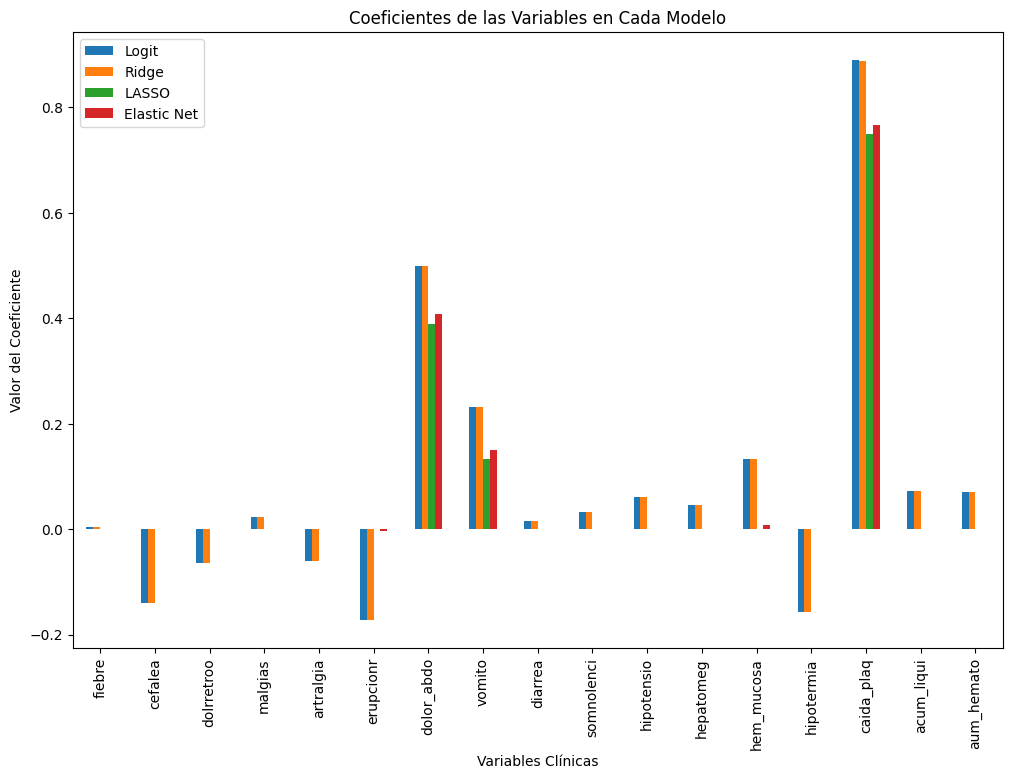

In [ ]:
# Convertir coeficientes a DataFrame para visualizar
coef_df = pd.DataFrame(coefs, index=variables_clinicas)
coef_df.plot(kind='bar', figsize=(12, 8))
plt.title("Coeficientes de las Variables en Cada Modelo")
plt.ylabel("Valor del Coeficiente")
plt.xlabel("Variables Clínicas")
plt.show()

###Identificación de variables más representativas:

* Las variables con coeficientes grandes en cualquiera de los modelos (especialmente en LASSO y Elastic Net) son indicadores importantes de hospitalización.

* Las variables clínicas relacionadas con síntomas severos como "caida_plaq" (caída de plaquetas), "acum_liqui" (acumulación de líquido), "hipotensio" (hipotensión), y "aum_hemato" (aumento del hematocrito) tienden a ser más relevantes. Estos síntomas sugieren complicaciones graves en los pacientes, lo cual es coherente con el conocimiento médico sobre el dengue y su tratamiento.

* Otros síntomas significativos: Algunas variables como "dolor_abdo" (dolor abdominal) y "hepatomeg" (hepatomegalia) también pueden destacar por su asociación con casos más graves de dengue que requieren atención hospitalaria.

###Conclusión:

Las variables con los mayores coeficientes en LASSO y Elastic Net indican que ciertos síntomas clínicos severos son determinantes para predecir la hospitalización, alineándose con el fenómeno médico del dengue y su gravedad.
Comparar estos hallazgos con el artículo mencionado permite validar que los patrones sociodemográficos y clínicos juegan un papel fundamental en el manejo del dengue en Antioquia, Colombia.
Esta interpretación sugiere que un seguimiento más cercano a pacientes con estos síntomas críticos podría ayudar a mejorar las decisiones de hospitalización, optimizando los recursos en salud pública.

##Conclusiones.

El artículo y el análisis realizados en el Notebook coinciden en que los factores sociodemográficos y las características clínicas específicas son determinantes importantes para identificar si un caso se clasifica como “dengue normal” o “dengue grave” en Antioquia, así mismo la integración de estos 2 factores influye en la Identificación de la Necesidad de Hospitalización. Es así como utilizar únicamente las características Sociodemográficas o clínicas por separado no permite obtener precisión en la clasificación, se deben analizar ambas.

A continuación, recordaremos las variables mas relevantes obteniadas en los ejercicios propuestos.


##Factores Sociodemográficos Relevantes en la determinación de Gravedad: "Dengue" vs. "Dengue Grave":
* Edad y Ocupación: La población en edad adulta joven y de clase socioeconómica media-baja, especialmente aquellos en ocupaciones de riesgo como trabajos agrícolas o de construcción (que aumentan la exposición a los mosquitos en áreas rurales), tienen una mayor prevalencia de dengue y dengue grave en estas subregiones.

* Área de Residencia (urbana o rural): El tipo de asentamiento influye en el riesgo de gravedad. Las áreas rurales y poblados semiurbanos suelen tener menor infraestructura de salud y mayores problemas de agua potable y saneamiento, lo que agrava la exposición y la infección.

* Región o Subregión: Las subregiones como Urabá y Bajo Cauca muestran una alta incidencia de dengue grave (según Articulo), lo cual está influenciado por factores como el clima cálido y húmedo, pobreza, y limitaciones en el acceso a servicios básicos. Estas áreas son propicias para la reproducción del mosquito (Aedes aegypti), aumentando la exposición al virus y, potencialmente, la gravedad de la infección.

## Identificación de la Necesidad de Hospitalización
Para determinar si un paciente necesita hospitalización, tanto el artículo como el Notebook destacan el uso de factores clínicos y ciertos aspectos sociodemográficos.

Variables Clínicas Importantes para Hospitalización:

* Síntomas Asociados a Hospitalización: Las variables más predictivas incluyen somnolencia, hipotensión, dolor abdominal, vómito, hepatomegalia y caídas severas en el conteo de plaquetas. La frecuencia y severidad de estos síntomas están asociados a una mayor probabilidad de requerir hospitalización, ya que son indicativos de una posible progresión hacia el dengue grave.

* Deterioro Clínico Rápido: Un tiempo de deterioro clínico más corto, o la necesidad de intervención médica temprana, es un indicador crítico para decidir la hospitalización. Esto está alineado con el enfoque del modelo de regresión de Cox del artículo, que muestra cómo factores como el sexo masculino y el tipo de asentamiento afectan la velocidad del deterioro clínico.



